In [1]:
import gym
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>

In [2]:
env.observation_space

Discrete(16)

In [3]:
env.action_space # left:0, down:1, right:2, up:3

Discrete(4)

In [4]:
observation, info = env.reset()
observation, info

(0, {'prob': 1})

In [5]:
action = env.action_space.sample()
action

2

In [6]:
env_screen = env.render() # numpy array

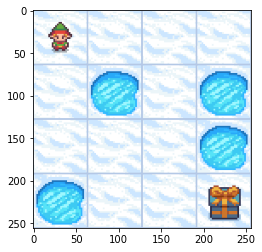

In [7]:
plt.imshow(env_screen)

In [8]:
###################################
# play Frozen Lake with a policy
###################################

import gym
import numpy as np

policy = [0,3,3,3,
          0,0,0,0,
          3,1,0,1,
          1,2,1,2]

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
observation, _ = env.reset()
NUM_EPISODES = 1000
rewards = np.zeros(NUM_EPISODES)
for i in range(NUM_EPISODES):
    terminated = False
    action = policy[0]
    env.reset()
    while not terminated:
        observation, reward, terminated, truncated, info = env.step(action)
        action = policy[observation]
    rewards[i] = reward
rewards.mean()

0.832

MovieWriter ffmpeg unavailable; using Pillow instead.


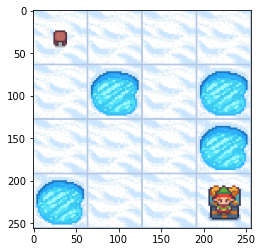

In [9]:
###################################
# record the states and create an animation
###################################

import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

policy = [0,3,3,3,
          0,0,0,0,
          3,1,0,1,
          1,2,1,2]

env = gym.make("FrozenLake-v1", render_mode="rgb_array")
NUM_EPISODES = 1000
screens = []
for i in range(NUM_EPISODES):
    terminated = False
    action = policy[0]
    env.reset()
    while not terminated:
        observation, reward, terminated, truncated, info = env.step(action)
        action = policy[observation]
        screens.append(env.render())
    # solved
    if reward > 0:
        break
    # perepare next step
    screens.clear()

####################################################
# create an animation
#===================================================

fig, ax = plt.subplots()
im = ax.imshow(screens[0])

def update(i):
    im.set_data(screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(screens), interval=100)
animation.save('frozen_lake.gif')
plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())
